In [1]:
# Test should run from root
import os
from os.path import join
from pathlib import Path
import numpy as np
from omegaconf import OmegaConf
import rasterio
from rasterio.plot import show
from multiearth.api import extract_assets
from multiearth.config import ConfigSchema

import matplotlib.pyplot as plt
import xarray as xr

os.chdir("..")

/anaconda3/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cfg = OmegaConf.load("config/daymet.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

In [3]:
cfg

{'default_collection': {'id': None, 'assets': None, 'outdir': 'data', 'datetime': '2019-06-01/2019-06-02', 'aoi_file': 'config/aoi/demo.json', 'max_items': -1}, 'providers': [{'id': <ProviderKey.XARR_MPC: 'XarrMPC'>, 'kwargs': {}, 'collections': [{'id': 'daymet-daily-na', 'assets': ['prcp'], 'outdir': None, 'datetime': None, 'aoi_file': None, 'max_items': -1}]}], 'system': {'log_outdir': './logs', 'log_level': 'INFO', 'dry_run': False, 'max_concurrent_extractions': 10, 'max_download_attempts': 3, 'remove_existing_if_wrong_size': False, 'query_asset_sizes': True}, 'run_id': ''}

In [4]:
# Constrain the test to only pull one item and one band
for pvdr in cfg.providers:
    for coll in pvdr.collections:
        coll.max_items = 1
        coll.assets = ["tmax"]

success = extract_assets(cfg)
print("Successfully extracted assets." if success else "Asset extraction failed.")

07:27:21 INFO - Extraction details for provider ProviderKey.XARR_MPC with collection daymet-daily-na: 
id: daymet-daily-na
assets:
- tmax
outdir: null
datetime: null
aoi_file: null
max_items: 1



POLYGON ((-119.81414794921875 38.20365531807149, -119.81414794921875 37.898697801966094, -119.75646972656249 37.42688834526727, -119.32525634765625 37.38325280195101, -118.96545410156251 37.45087706042972, -119.124755859375 37.81629348024509, -119.39666748046874 38.1215932716592, -119.6575927734375 38.23818011979866, -120.1080322265625 38.17991001446116, -119.81414794921875 38.20365531807149))
beginning download
info
xarray.Dataset {
dimensions:
	time = 1 ;
	y = 98 ;
	x = 75 ;

variables:
	float32 tmax(time, y, x) ;
		tmax:cell_methods = area: mean time: maximum ;
		tmax:grid_mapping = lambert_conformal_conic ;
		tmax:long_name = daily maximum temperature ;
		tmax:units = degrees C ;
	int16 lambert_conformal_conic() ;
		lambert_conformal_conic:false_easting = 0.0 ;
		lambert_conformal_conic:false_northing = 0.0 ;
		lambert_conformal_conic:grid_mapping_name = lambert_conformal_conic ;
		lambert_conformal_conic:inverse_flattening = 298.257223563 ;
		lambert_conformal_conic:latitude_of_pr

/anaconda3/envs/metaearth/lib/python3.8/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Successfully extracted assets.


In [5]:
fpath = Path(cfg["default_collection"]["outdir"])
ds_disk = xr.open_dataset(join(fpath, "daymet-daily-na_result.nc"))

In [6]:
ds_disk

<xarray.Dataset>
Dimensions:                  (time: 1, y: 98, x: 75)
Coordinates:
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
  * time                     (time) datetime64[ns] 2019-06-01T12:00:00
  * x                        (x) float32 -1.669e+06 -1.668e+06 ... -1.595e+06
  * y                        (y) float32 -2.56e+05 -2.57e+05 ... -3.53e+05
Data variables:
    tmax                     (time, y, x) float32 ...
    lambert_conformal_conic  int16 ...
Attributes:
    Conventions:       CF-1.6
    Version_data:      Daymet Data Version 4.0
    Version_software:  Daymet Software Version 4.0
    citation:          Please see http://daymet.ornl.gov/ for current Daymet ...
    references:        Please see http://daymet.ornl.gov/ for current informa...
    source:            Daymet Software Version 4.0
    start_year:        1980

In [8]:
mask = np.load(join(fpath, "daymet-daily-na_aoi_mask.npy"))

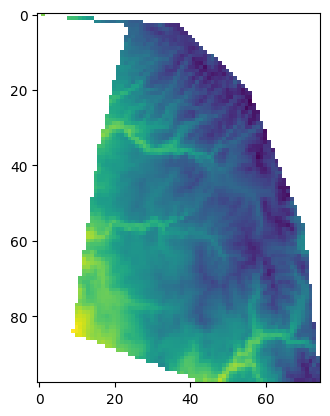

In [9]:
plt.imshow((ds_disk["tmax"][0].T * mask).T)